In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [133]:
import zipfile

with zipfile.ZipFile('/kaggle/input/facial-keypoints-detection/training.zip', 'r') as z:
    z.extractall('/kaggle/working/train')

In [134]:
df = pd.read_csv('/kaggle/working/train/training.csv')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [136]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [138]:
df.isna().sum(axis=0)

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [139]:
df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
7044    22
7045    22
7046    22
7047    22
7048    22
Length: 7049, dtype: int64

In [140]:
df.tail()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...
7048,66.938311,43.424510,31.096059,39.528604,NaN,NaN,NaN,NaN,NaN,NaN,...,73.033339,NaN,NaN,NaN,NaN,NaN,NaN,45.900480,82.773096,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


In [141]:
df_with_no_na = df.dropna(how='any')
df_with_no_na.shape

(2140, 31)

In [142]:
df.shape

(7049, 31)

In [190]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(32, (3,), input_shape=(96, 96), activation='relu'),
        tf.keras.layers.MaxPooling1D(),
            
        tf.keras.layers.Conv1D(64, (3,), activation='relu'),
        tf.keras.layers.MaxPooling1D(),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        
        tf.keras.layers.Dropout(0.7),
        tf.keras.layers.Dense(30, activation='linear')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
        
    return model

def show_samples(X):
    for i in range(len(X)):
        plt.imshow(X[i].reshape(96, 96))
        plt.title(f'{i} sample')
        plt.show()
        
        
def train(df, batch_size, epochs):
    # Preparation data
    X_not_prepared = df[['Image']].to_numpy()
    n_samples = len(X_not_prepared)
    m_features = len(X_not_prepared[0, 0].split())
    print(f"Shape of X: ({n_samples}, {m_features})")
    # Take data
    X = np.empty((n_samples, m_features))
    for i in range(n_samples):
        X[i] = np.array(list(map(int, X_not_prepared[i, 0].split())))
    # Visualization of X
    show_samples(X[(n_samples // 2 - 3): (n_samples // 2 + 3)])
    # Take true values
    Y = df.drop('Image', axis=1).to_numpy()
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    print(f'Shape of sets: X_train - {X_train.shape}, X_test{X_test.shape}, \
          Y_train{Y_train.shape}, Y_test{Y_test.shape}.')
    # Train model
    model = create_model()
    history = model.fit(X_train.reshape(-1, 96, 96),
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test.reshape(-1, 96, 96), Y_test))
    
    return model, history, (X_train, X_test, Y_train, Y_test)
    

Shape of X: (2140, 9216)


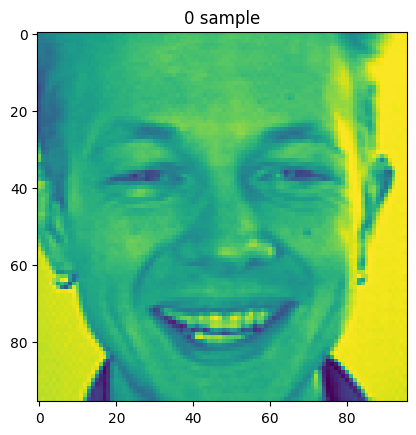

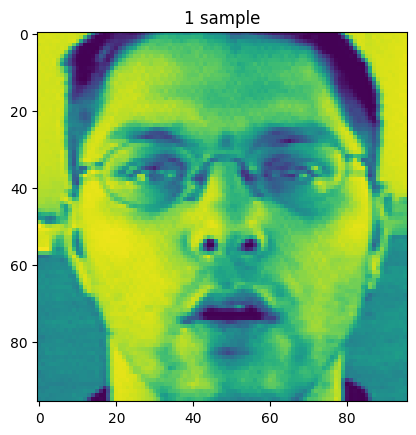

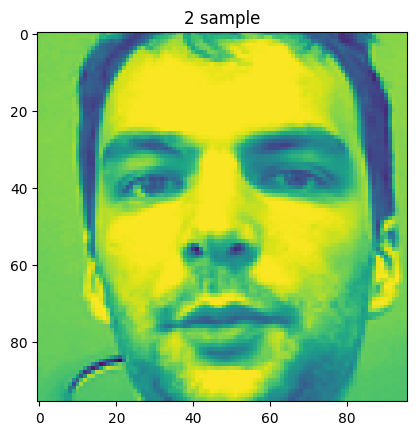

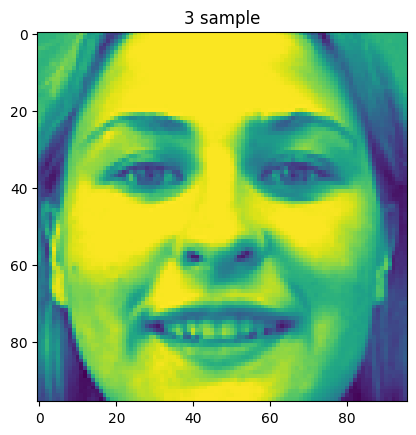

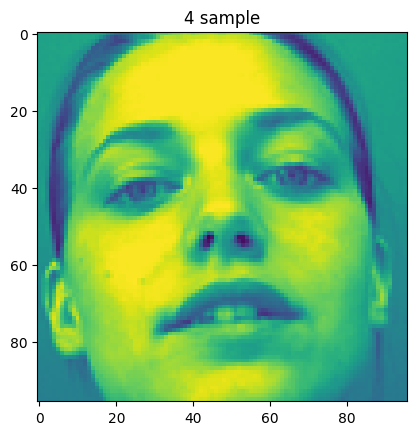

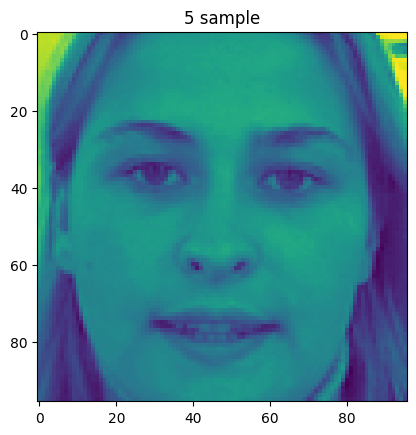

Shape of sets: X_train - (1712, 9216), X_test(428, 9216),           Y_train(1712, 30), Y_test(428, 30).


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3442.8430 - root_mean_squared_error: 54.2441 - val_loss: 141.1928 - val_root_mean_squared_error: 11.9087
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 352.8065 - root_mean_squared_error: 18.7766 - val_loss: 136.1632 - val_root_mean_squared_error: 11.7183
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 283.5010 - root_mean_squared_error: 16.8346 - val_loss: 106.2375 - val_root_mean_squared_error: 10.3479
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 229.0722 - root_mean_squared_error: 15.1313 - val_loss: 153.3599 - val_root_mean_squared_error: 12.4040
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 212.7983 - root_mean_squared_error: 14.5775 - val_loss: 98.2105 - val_root_mean_squared_error: 9.9647
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 195.9350 - root_mean_squared_error: 13.9959 - val_loss: 102.4396 - val_root_mean_squared_error: 10.1703
Epoch 7/50
54/54 ━━━━━━

In [191]:
model, history, data = train(df_with_no_na, 32, 50)

In [192]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 94, 32)         │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 47, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 45, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       721,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,256,764 (8.61 MB)

 Trainable params: 752,254 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,504,510 (5.74 MB)

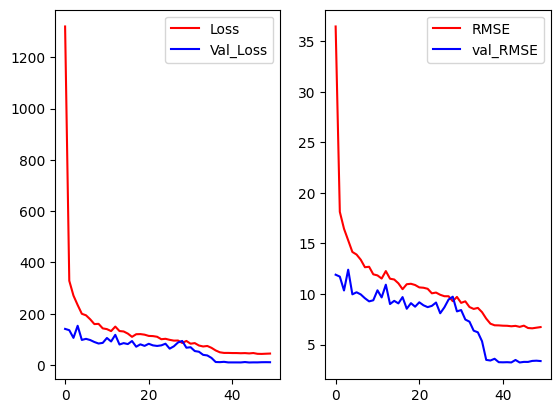

In [193]:
def train_stat_vis(history):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].plot(history.history['loss'], c='red', label='Loss')
    axs[0].plot(history.history['val_loss'], c='blue', label='Val_Loss')
    axs[0].legend()
    axs[1].plot(history.history['root_mean_squared_error'], c='red', label='RMSE')
    axs[1].plot(history.history['val_root_mean_squared_error'], c='blue', label='val_RMSE')
    axs[0].legend()
    axs[1].legend()
    plt.show()
    
train_stat_vis(history)

In [194]:
predictions = model.predict(data[1].reshape(-1, 96, 96))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [195]:
y_true = data[-1]

In [196]:
np.sqrt(np.sum(np.square(y_true - predictions))) / len(y_true)

0.8917951180978403

In [197]:
def visualize_res(X, Y_true, Predictions):
    samples = np.random.randint(0, len(X), 10)
    for s in samples:
        x = X[s]
        y_true = Y_true[s]
        pred = Predictions[s]
        plt.imshow(x.reshape(96, 96))
        plt.scatter(y_true[::2], y_true[1::2], c='g', marker='+')
        plt.scatter(pred[::2], pred[1::2], c='r', marker='o', alpha=0.2)
        plt.show()
    

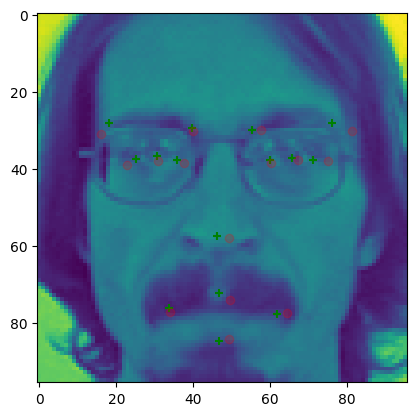

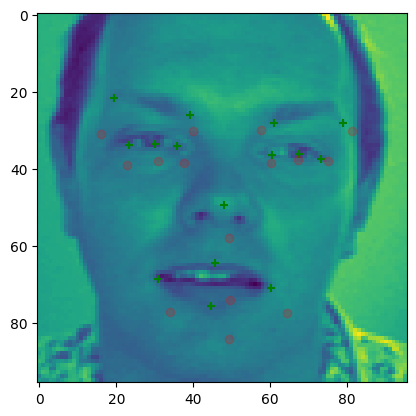

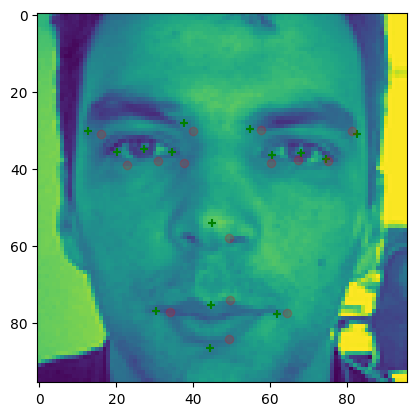

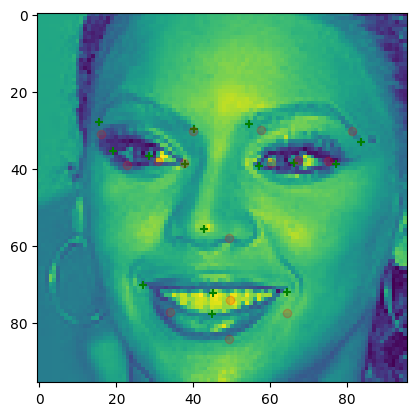

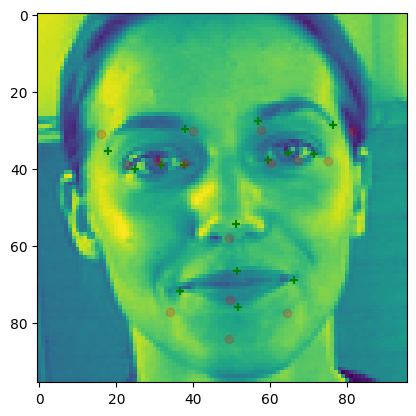

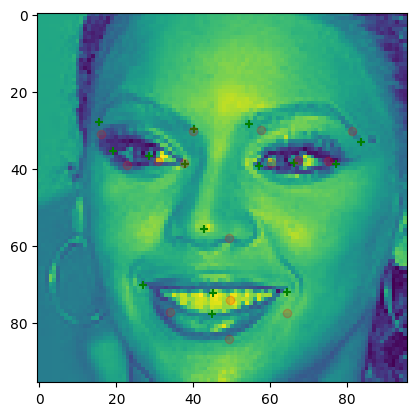

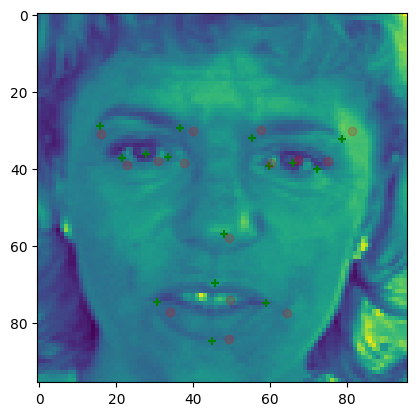

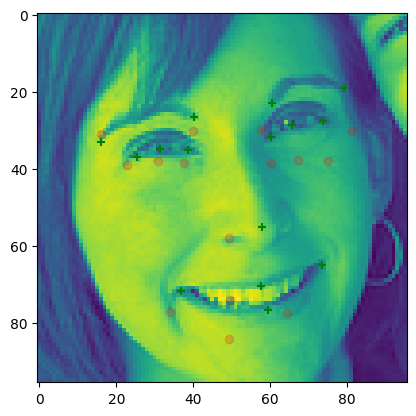

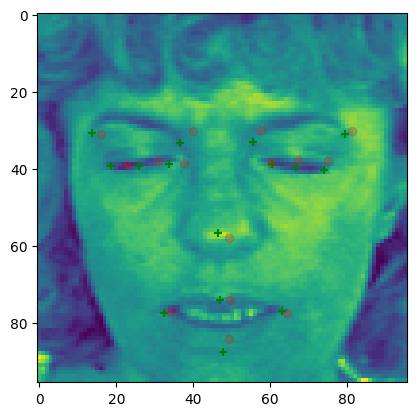

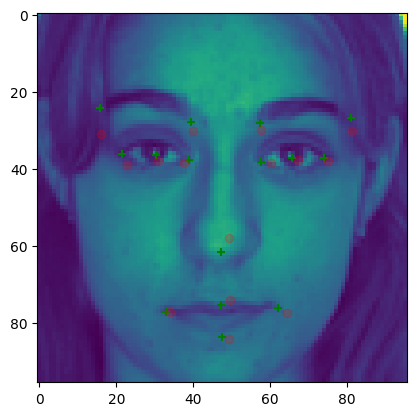

In [198]:
visualize_res(data[1], y_true, predictions)

In [199]:
def fill_nan(df):
    df_cp = df.copy()
    X = df_cp[['Image']]
    df_cp.drop('Image', axis=1)
    for col in df_cp.columns:
        df_cp[col] = df_cp[col].fillna(df_cp[col].mode()[0])
    df_cp['Image'] = X
    return df_cp
        

In [200]:
df_with_replaced_nan = fill_nan(df)

In [201]:
df_with_replaced_nan.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

Shape of X: (7049, 9216)


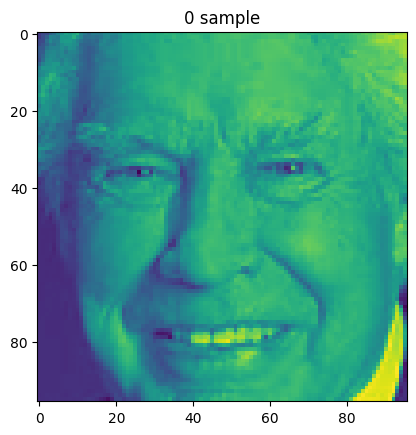

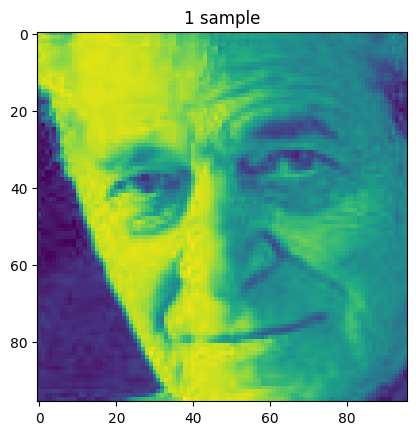

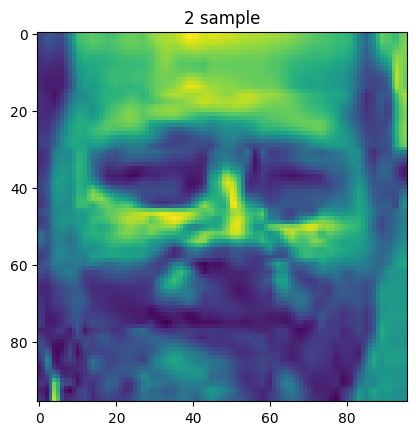

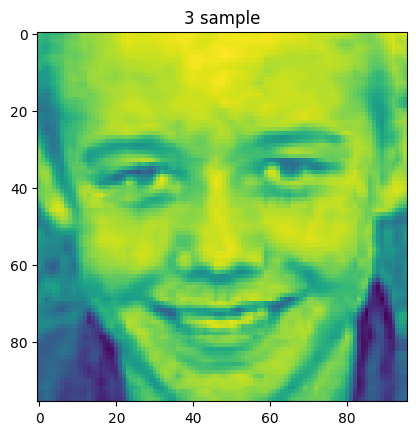

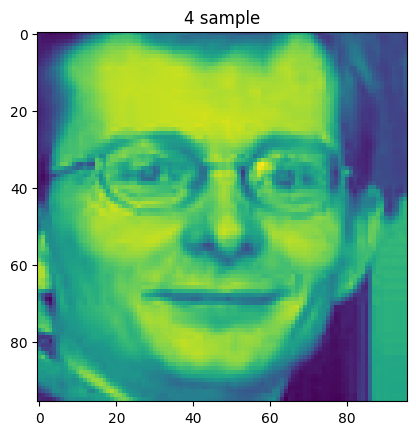

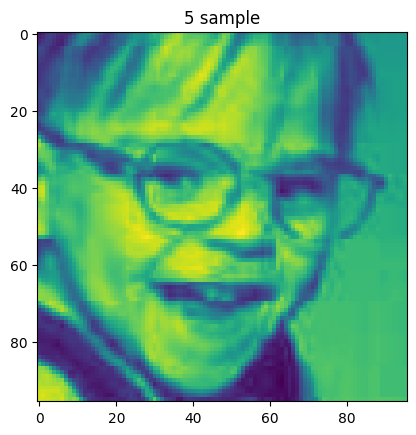

Shape of sets: X_train - (5639, 9216), X_test(1410, 9216),           Y_train(5639, 30), Y_test(1410, 30).


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1889.5288 - root_mean_squared_error: 39.0115 - val_loss: 157.0796 - val_root_mean_squared_error: 12.2063
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 235.1947 - root_mean_squared_error: 15.3334 - val_loss: 135.1440 - val_root_mean_squared_error: 11.2867
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 203.9535 - root_mean_squared_error: 14.2790 - val_loss: 150.0836 - val_root_mean_squared_error: 11.7742
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 195.7823 - root_mean_squared_error: 13.9837 - val_loss: 108.5962 - val_root_mean_squared_error: 10.1813
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 175.3401 - root_mean_squared_error: 13.2353 - val_loss: 98.6291 - val_root_mean_squared_error: 9.5401
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 153.1999 - root_mean_squared_error: 12.3726 - val_loss: 113.5067 - val_root_mean_squared_error: 10.4563
Epoch 7/50


In [202]:
model2, history2, data2 = train(df_with_replaced_nan, 32, 50)

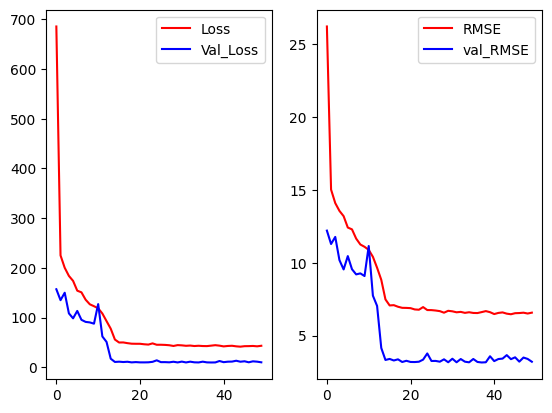

In [203]:
train_stat_vis(history2)

In [204]:
predictions2 = model.predict(data2[1].reshape(-1, 96, 96))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [205]:
y_true2 = data2[-1]

In [206]:
np.sqrt(np.sum(np.square(y_true2 - predictions2))) / len(y_true2)

0.6528811679010861

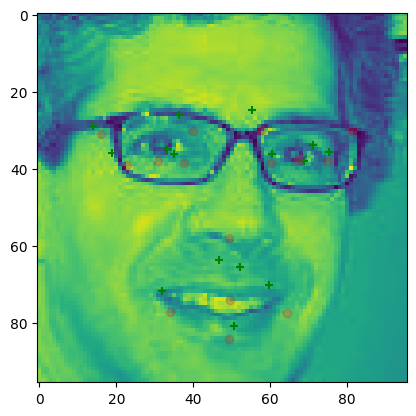

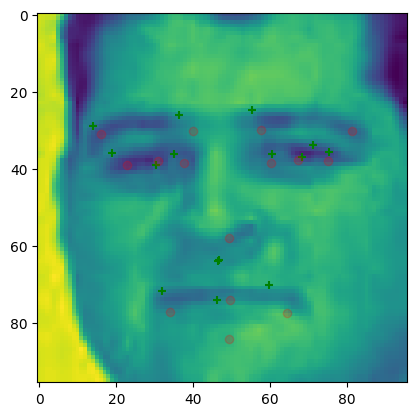

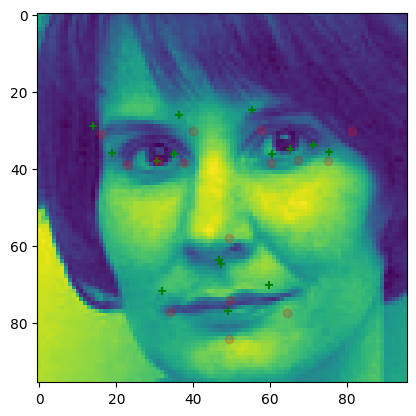

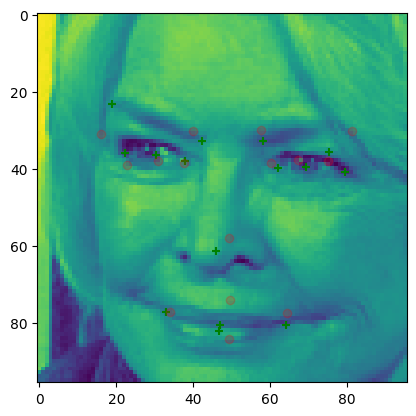

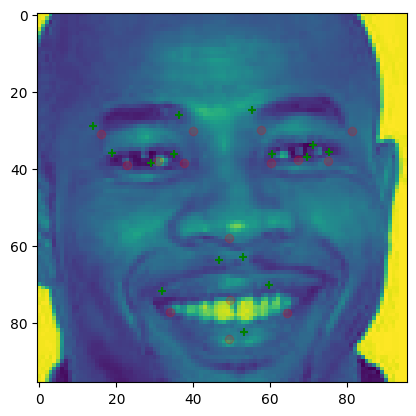

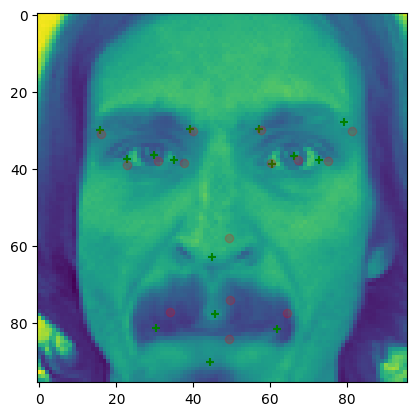

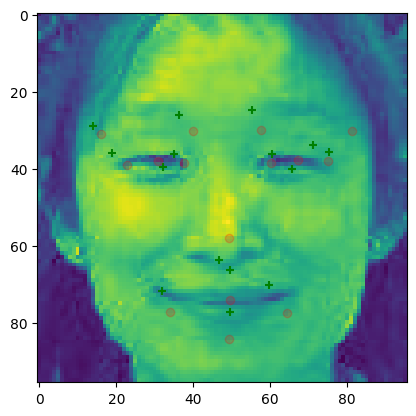

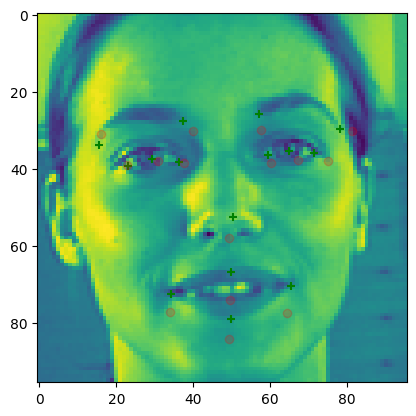

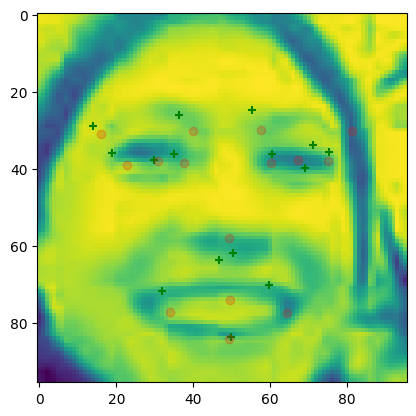

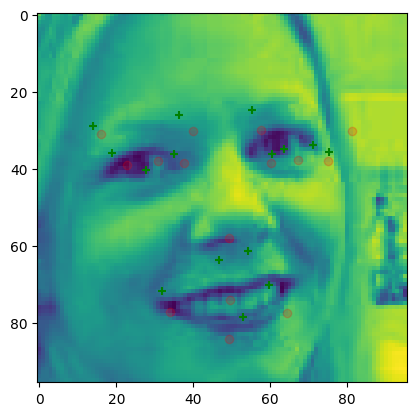

In [207]:
visualize_res(data2[1], y_true2, predictions2)

# Evaluate MODEL

In [208]:
with zipfile.ZipFile('/kaggle/input/facial-keypoints-detection/test.zip', 'r') as z:
    z.extractall('/kaggle/working/test')

In [209]:
df_test = pd.read_csv('/kaggle/working/test/test.csv')

In [210]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [211]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


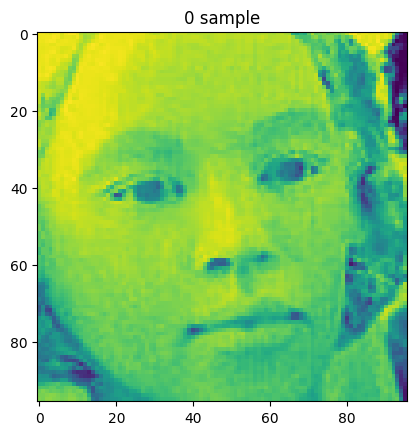

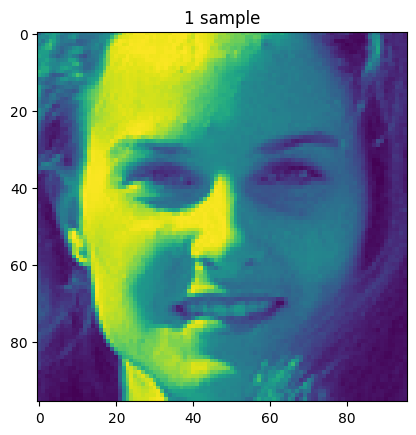

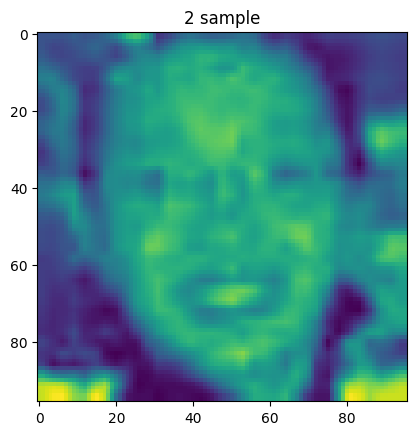

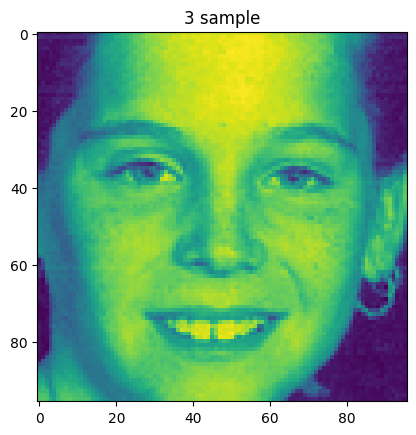

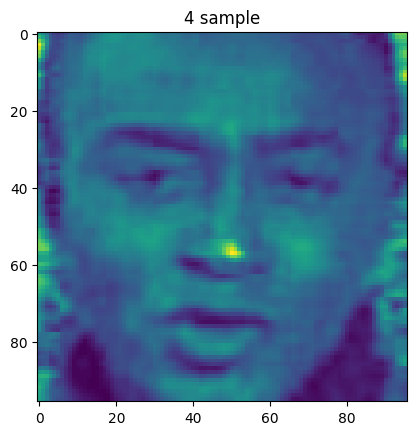

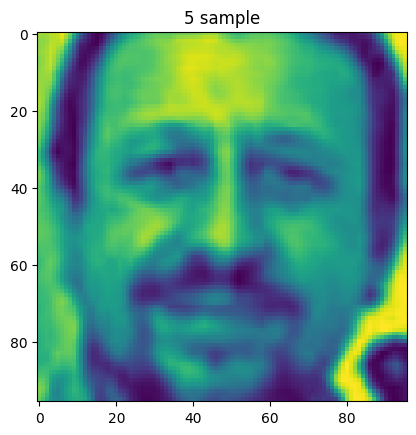

In [212]:
images = df_test[['Image']].to_numpy()
n_samples_2 = len(images)
m_features_2 = len(images[0, 0].split())
X_sub = np.empty((n_samples_2, m_features_2))
for i in range(n_samples_2):
    X_sub[i] = np.array(list(map(int, images[i, 0].split())))
# Visualization of X_sub
show_samples(X_sub[(n_samples_2 // 2 - 3): (n_samples_2 // 2 + 3)])

In [213]:
print(f'({n_samples_2}, {m_features_2})')

(1783, 9216)


In [214]:
columns = df.columns.to_list()[:-1]
columns, len(columns)

(['left_eye_center_x',
  'left_eye_center_y',
  'right_eye_center_x',
  'right_eye_center_y',
  'left_eye_inner_corner_x',
  'left_eye_inner_corner_y',
  'left_eye_outer_corner_x',
  'left_eye_outer_corner_y',
  'right_eye_inner_corner_x',
  'right_eye_inner_corner_y',
  'right_eye_outer_corner_x',
  'right_eye_outer_corner_y',
  'left_eyebrow_inner_end_x',
  'left_eyebrow_inner_end_y',
  'left_eyebrow_outer_end_x',
  'left_eyebrow_outer_end_y',
  'right_eyebrow_inner_end_x',
  'right_eyebrow_inner_end_y',
  'right_eyebrow_outer_end_x',
  'right_eyebrow_outer_end_y',
  'nose_tip_x',
  'nose_tip_y',
  'mouth_left_corner_x',
  'mouth_left_corner_y',
  'mouth_right_corner_x',
  'mouth_right_corner_y',
  'mouth_center_top_lip_x',
  'mouth_center_top_lip_y',
  'mouth_center_bottom_lip_x',
  'mouth_center_bottom_lip_y'],
 30)

In [215]:
predictions_test = model.predict(X_sub.reshape(-1, 96, 96))
predictions_test2 = model2.predict(X_sub.reshape(-1, 96, 96))

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [217]:
def visualize_res_sub(X, Predictions):
    samples = np.random.randint(0, len(X), 10)
    for s in samples:
        x = X[s]
        pred = Predictions[s]
        plt.imshow(x.reshape(96, 96))
        plt.scatter(pred[::2], pred[1::2], c='r', marker='o', alpha=0.2)
        plt.show()

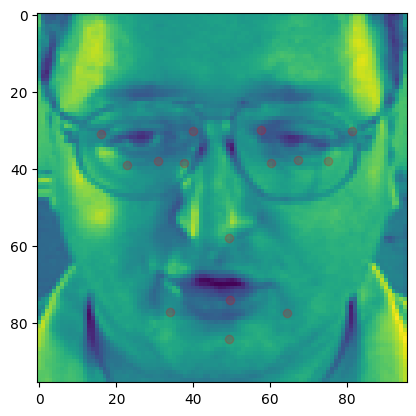

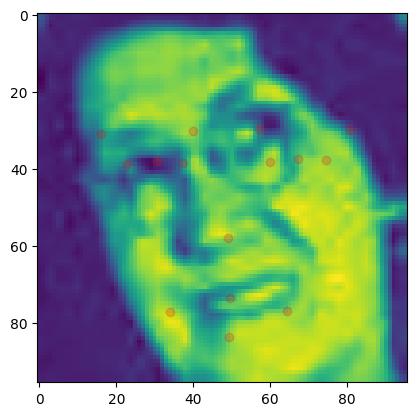

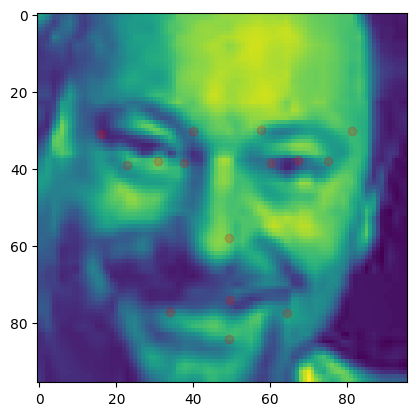

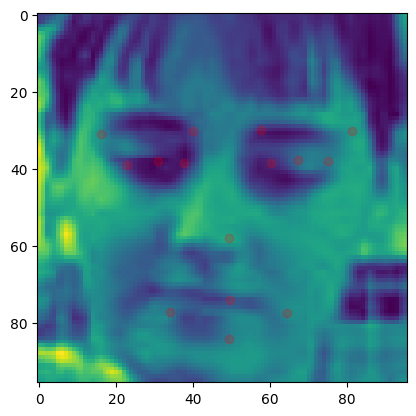

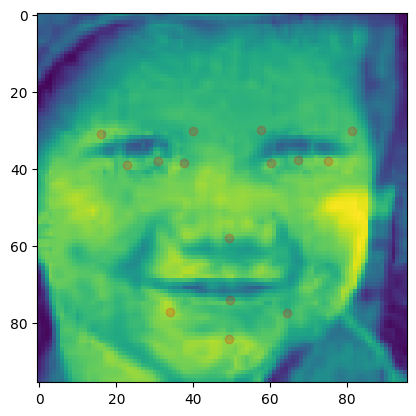

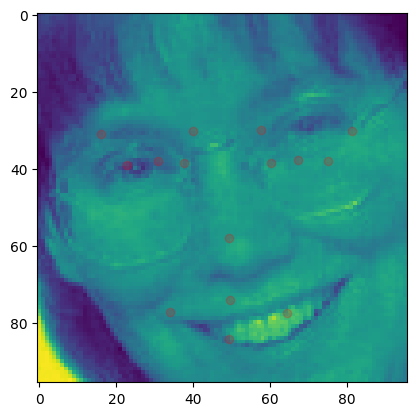

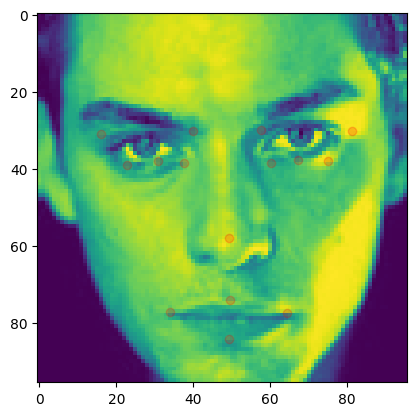

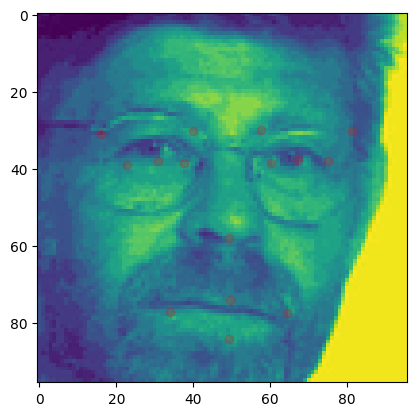

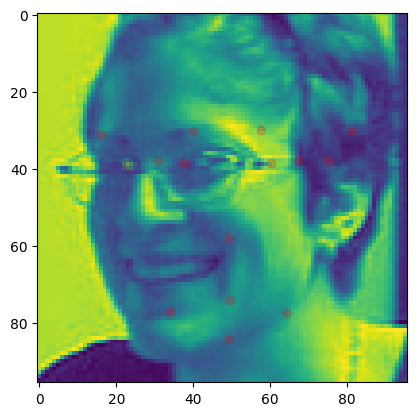

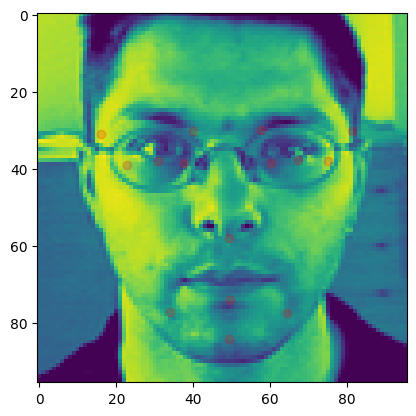

In [218]:
visualize_res_sub(X_sub, predictions_test)

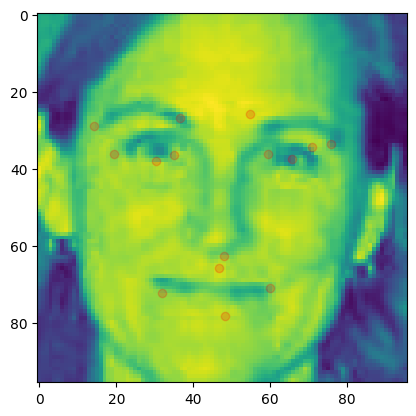

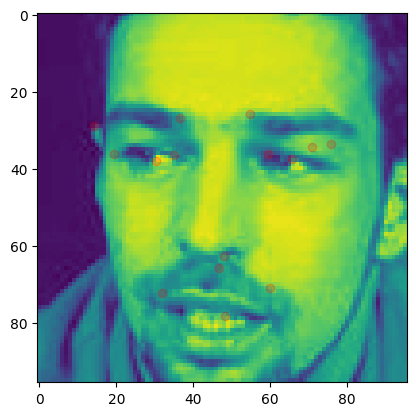

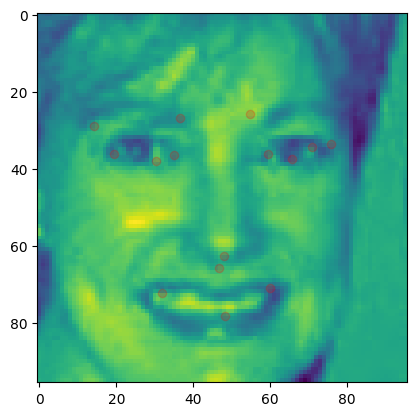

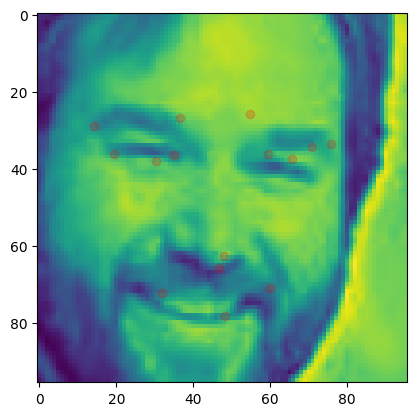

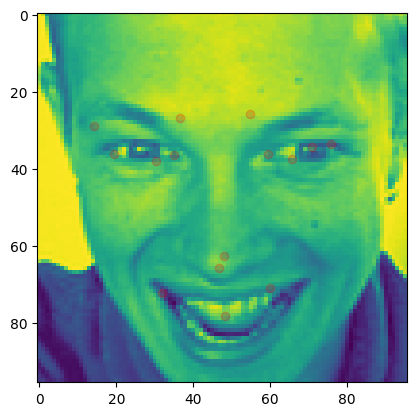

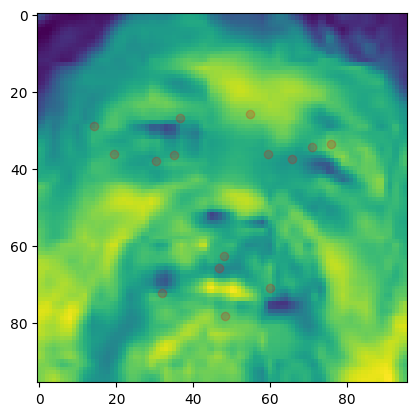

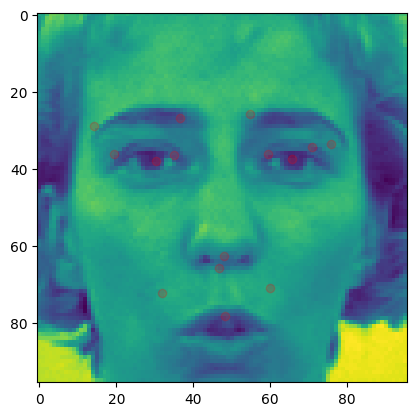

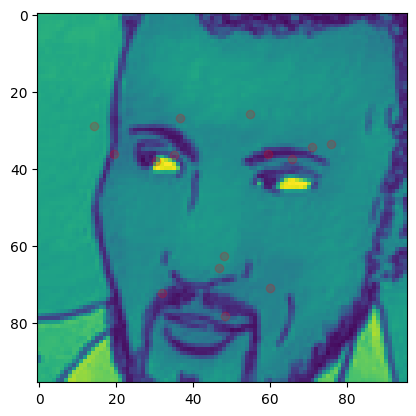

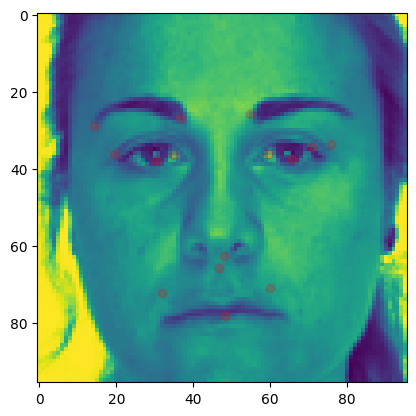

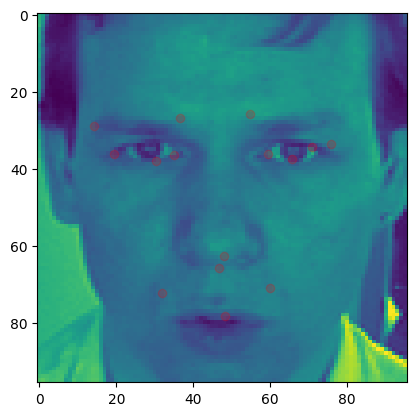

In [219]:
visualize_res_sub(X_sub, predictions_test2)

In [326]:
res_dict = {'RowId': [], 'ImageId': [], 'FeatureName': [], 'Location': []}
res_dict

{'RowId': [], 'ImageId': [], 'FeatureName': [], 'Location': []}

In [327]:
n, m = predictions_test.shape
n, m

(1783, 30)

In [328]:
for image_index in range(n):
    for fn in range(m):
        res_dict['RowId'].append((image_index * 30) + (fn + 1))
        res_dict['ImageId'].append(image_index + 1)
        res_dict['FeatureName'].append(columns[fn])
        res_dict['Location'].append(predictions_test[image_index][fn])
    

In [329]:
df_res = pd.DataFrame(res_dict)

In [330]:
df_res.head(40)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,67.125763
1,2,1,left_eye_center_y,37.710747
2,3,1,right_eye_center_x,30.893351
3,4,1,right_eye_center_y,37.946018
4,5,1,left_eye_inner_corner_x,60.235413
5,6,1,left_eye_inner_corner_y,38.448574
6,7,1,left_eye_outer_corner_x,75.008156
7,8,1,left_eye_outer_corner_y,38.087570
8,9,1,right_eye_inner_corner_x,37.690941
9,10,1,right_eye_inner_corner_y,38.479107


In [331]:
df_res.tail()

,RowId,ImageId,FeatureName,Location
53485,53486,1783,mouth_right_corner_y,77.168594
53486,53487,1783,mouth_center_top_lip_x,49.550076
53487,53488,1783,mouth_center_top_lip_y,74.107193
53488,53489,1783,mouth_center_bottom_lip_x,49.327599
53489,53490,1783,mouth_center_bottom_lip_y,84.383186


In [332]:
#df_res.set_index('RowId', inplace=True)
#df_res.head()

In [333]:
df_res.to_csv('/kaggle/working/test/table.csv', sep=',')
df_res.to_csv('/kaggle/working/table.csv', sep=',')

In [334]:
ids = pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')

In [335]:
ids.shape

(27124, 4)

In [336]:
ids.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [337]:
images_ids = list(ids['ImageId'])
features_names = list(ids['FeatureName'])
rows_id = list(ids["RowId"])

In [370]:
sub_res = {'RowId':[], 'Location': []}

In [371]:
columns_df_res = df_res.columns.to_list()
columns_df_res

['RowId', 'ImageId', 'FeatureName', 'Location']

In [373]:
for ii, fn, ri in zip(images_ids, features_names, rows_id):
    loc = df_res[(df_res['ImageId'] == ii) & (df_res['FeatureName'] == fn)]['Location'].to_numpy()[0]
    sub_res['RowId'].append(ri)
    sub_res['Location'].append(loc)

In [375]:
len(sub_res)

2

In [387]:
sub_res['RowId'].pop(0)

1

In [400]:
df_submission = pd.DataFrame(sub_res)

In [401]:
df_submission['Location'] = df_submission['Location'].clip(0.0, 96.0)

In [402]:
df_submission.to_csv('/kaggle/working/submission.csv', index=False)

In [403]:
df_submission.max()

RowId       27124.0
Location       96.0
dtype: float64